# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 1.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

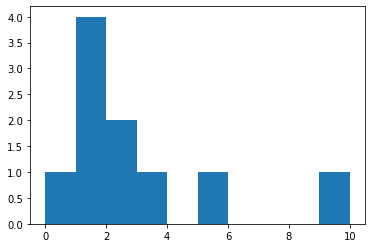

In [9]:
plt.hist(X[1]);

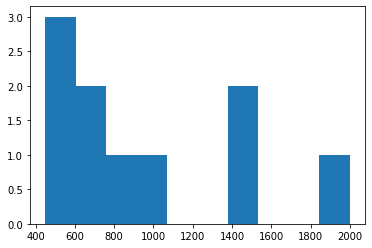

In [10]:
plt.hist(X[2]);

In [11]:
X1_mean = X[1].mean()
X1_mean

2.6

In [12]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [13]:
X_st = X.copy().astype(np.float64)

In [14]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

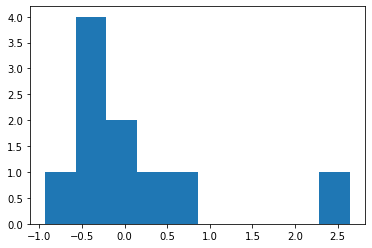

In [15]:
plt.hist(X_st[1]);

In [16]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [17]:
X_st[2] = custom_StandardScaler(X[2])

In [18]:
X_st[3] = custom_StandardScaler(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

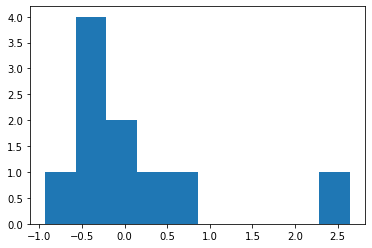

In [19]:
plt.hist(X_st[1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [22]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 100.02483950148556, веса: [49.82547494  4.60121068  3.1631798   3.84388877]
# итерация: 200, MSE: 41.17496461083099, веса: [56.39546985  4.89435344  2.89255025  3.86194973]
# итерация: 300, MSE: 40.03406584214221, веса: [57.26677966  5.12099178  2.65490626  3.87593008]
# итерация: 400, MSE: 39.941764074876126, веса: [57.38233238  5.30429045  2.45549131  3.89446689]
# итерация: 500, MSE: 39.89067393779927, веса: [57.39765693  5.45289119  2.28826373  3.91514511]
# итерация: 600, MSE: 39.85579470578695, веса: [57.39968926  5.57361679  2.14808741  3.93633183]
# итерация: 700, MSE: 39.83177724049849, веса: [57.39995879  5.67189376  2.03063081  3.95697842]
# итерация: 800, MSE: 39.81520003806121, веса: [57.39999453  5.75204947  1.93224485  3.97644674]
# итерация: 900, MSE: 39.80373716487608, веса: [57.39999928  5.81754368  1.84985819  3.99438289]
# итерация: 1000, MSE: 39.79579871078698, веса: [57.3999999   5.87114953  1.78088787  4.01062634]


array([57.3999999 ,  5.87114953,  1.78088787,  4.01062634])

In [23]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 37.88443044152193, веса: [57.39602054  5.47895005  1.71849683  4.49354818]
# итерация: 1000, MSE: 38.33925266461676, веса: [57.39799372  5.94558925  1.5523296   4.19180924]
# итерация: 1500, MSE: 38.36299487596258, веса: [57.39785778  6.08062844  1.47672203  4.13244695]
# итерация: 2000, MSE: 38.32797836717914, веса: [57.39781361  6.12221573  1.44405402  4.12369511]
# итерация: 2500, MSE: 38.30249648041418, веса: [57.39779836  6.13587861  1.43031544  4.12387262]
# итерация: 3000, MSE: 38.289386053523614, веса: [57.39779282  6.14064139  1.4246236   4.12485122]
# итерация: 3500, MSE: 38.28339028364594, веса: [57.39779074  6.14238396  1.42228566  4.1254687 ]
# итерация: 4000, MSE: 38.2807928823674, веса: [57.39778993  6.1430448   1.42133014  4.12577283]
# итерация: 4500, MSE: 38.27969895716537, веса: [57.39778961  6.1433017   1.42094078  4.12590926]
# итерация: 5000, MSE: 38.279245371926145, веса: [57.39778948  6.1434032   1.42078239  4.12596778]


array([57.39778948,  6.1434032 ,  1.42078239,  4.12596778])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [25]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [26]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253417, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.807231204063974, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.782405042800356, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.77852356578889, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617128, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.7777793047026, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.777759834058934, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321602, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.777755024514185, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.77775476050768, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

### Решение

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

# итерация: 100, MSE: 100.1533272043271, веса: [49.8535115   3.66668135  3.48290916  4.46269156]
# итерация: 200, MSE: 41.521924794340364, веса: [56.39918804  4.16741325  3.166684    4.31348189]
# итерация: 300, MSE: 40.25688819717003, веса: [57.26727276  4.55529967  2.89027948  4.20488959]
# итерация: 400, MSE: 40.08337439140503, веса: [57.38239777  4.86307305  2.65691244  4.13291608]
# итерация: 500, MSE: 39.981548483509194, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 600, MSE: 39.91468961755855, веса: [57.39969041  5.30327372  2.29437853  4.05919065]
# итерация: 700, MSE: 39.870304338199894, веса: [57.39995894  5.45948993  2.15488025  4.04404572]
# итерация: 800, MSE: 39.84062200764765, веса: [57.39999455  5.58474142  2.03757468  4.03744875]
# итерация: 900, MSE: 39.82064430871084, веса: [57.39999928  5.6854157   1.93900185  4.03650044]
# итерация: 1000, MSE: 39.80712257860053, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 100, MSE: 100.

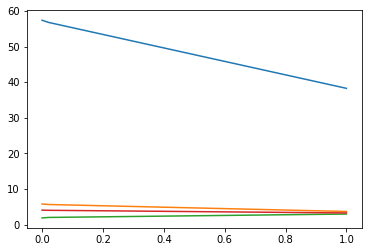

In [27]:
lambda_array = np.logspace(-10, 0, 7)
w_array = []

for l in lambda_array:
    w = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=l)
    w_array.append(w)
w_array = np.array(w_array)

for i in range(len(w_array[0])):
    plt.plot(lambda_array, w_array[:, i])
plt.show()

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  

Можно, но в этом нет смысла. Нормализация и стандартизация скалируют данные беря за основу разные формулы.

3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

In [28]:
def eval_model_reg1(X, y, _i, alpha=1e-4, lamda_=1e-8, verb=False):
    np.random.seed(42)
    W = np.random.rand(X.shape[0])
    n = X.shape[1]
    for i in range(1, _i + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lamda_ * np.sign(W))
        if verb:
            if i % (_i / 10) == 0:
                print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [29]:
eval_model_reg1(X_st, y, _i=4000, alpha=1e-2, lamda_=1e-4, verb=True)

# итерация: 400, MSE: 39.997053449523, веса: [57.38231     5.20193908  2.63312108  3.81671716]
# итерация: 800, MSE: 39.8283754300456, веса: [57.39994454  5.70117847  2.01845854  3.93988161]
# итерация: 1200, MSE: 39.78960002633381, веса: [57.39995     5.92607545  1.71672955  4.02060016]
# итерация: 1600, MSE: 39.78053729464927, веса: [57.39995     6.02967219  1.56908418  4.06657826]
# итерация: 2000, MSE: 39.77840498459234, веса: [57.39995     6.07818962  1.49698673  4.09110933]
# итерация: 2400, MSE: 39.77790178668375, веса: [57.39995     6.10118329  1.46182861  4.10374041]
# итерация: 2800, MSE: 39.77778287636075, веса: [57.39995     6.11217162  1.44469933  4.11010963]
# итерация: 3200, MSE: 39.77775475749167, веса: [57.39995     6.11745293  1.43635881  4.11328029]
# итерация: 3600, MSE: 39.77774810504614, веса: [57.39995     6.12000119  1.43229928  4.11484589]
# итерация: 4000, MSE: 39.77774653031221, веса: [57.39995     6.12123398  1.43032393  4.11561492]


array([57.39995   ,  6.12123398,  1.43032393,  4.11561492])